In [1]:
import numpy as np
import keras
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


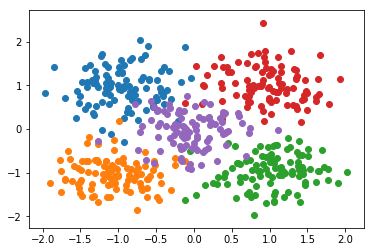

In [2]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std=0.4)
 
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [3]:
y_cat = to_categorical(y, 5)
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y_cat, verbose=1, batch_size = 50, epochs=100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
500/500 [==============================] - 0s 468us/step - loss: 1.3511 - acc: 0.3780
Epoch 2/100
500/500 [==============================] - 0s 28us/step - loss: 0.6617 - acc: 0.8680
Epoch 3/100
500/500 [==============================] - 0s 38us/step - loss: 0.4335 - acc: 0.9260
Epoch 4/100
500/500 [==============================] - 0s 38us/step - loss: 0.3356 - acc: 0.9400
Epoch 5/100
500/500 [==============================] - 0s 36us/step - loss: 0.2931 - acc: 0.9440
Epoch 6/100
500/500 [==============================] - 0s 38us/step - loss: 0.2645 - acc: 0.9400
Epoch 7/100
500/500 [==============================] - 0s 40us/step - loss: 0.2469 - acc: 0.9420
Epoch 8/100
500/500 [==============================] - 0s 38us/step - loss: 0.2349 - acc: 0.9460
Epoch 9/100
500/500 [==============================] - 0s 36us/step - loss: 0.2253 - acc: 0.9420
Epoch 

In [4]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

Prediction is:  [4]


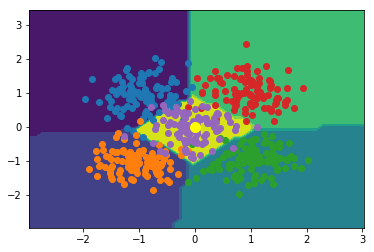

In [5]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
 
x = 0
y = 0
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="yellow")
print("Prediction is: ", prediction)